In [1]:
from helper.dataset_reader import read_tsv
from lang_id_crf import *
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
langid = LanguageIdentifier()

## Scenario 1
1. Using different data for training and test data.
2. Include named entity

In [3]:
train_data = read_tsv('../raw dataset/all-tagged-280322-train.tsv')
test_data = read_tsv('../raw dataset/all-tagged-080422-test.tsv')


 Evaluation on the test data
              precision    recall  f1-score   support

          ID       0.84      0.97      0.90     11123
          JV       0.89      0.82      0.85      4906
          EN       0.91      0.73      0.81      1746
          NE       0.86      0.32      0.46       675
           O       0.98      0.95      0.97      4817
   MIX-ID-EN       0.85      0.60      0.71       578
   MIX-ID-JV       0.96      0.38      0.54       204
   MIX-JV-EN       0.98      0.36      0.53       258

    accuracy                           0.88     24307
   macro avg       0.91      0.64      0.72     24307
weighted avg       0.89      0.88      0.88     24307

Confusion Matrix


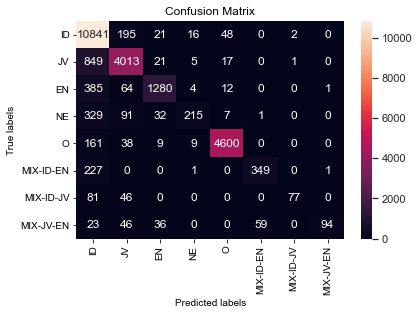


 Evaluation on the training data
              precision    recall  f1-score   support

          ID       0.96      0.99      0.97     38006
          JV       0.93      0.93      0.93      8918
          EN       0.98      0.92      0.95      4877
          NE       0.97      0.84      0.90      2611
           O       1.00      0.98      0.99     14499
   MIX-ID-EN       0.99      0.97      0.98      2107
   MIX-ID-JV       0.99      0.94      0.97       626
   MIX-JV-EN       0.97      0.93      0.95       525

    accuracy                           0.97     72169
   macro avg       0.97      0.94      0.95     72169
weighted avg       0.97      0.97      0.97     72169

Confusion Matrix


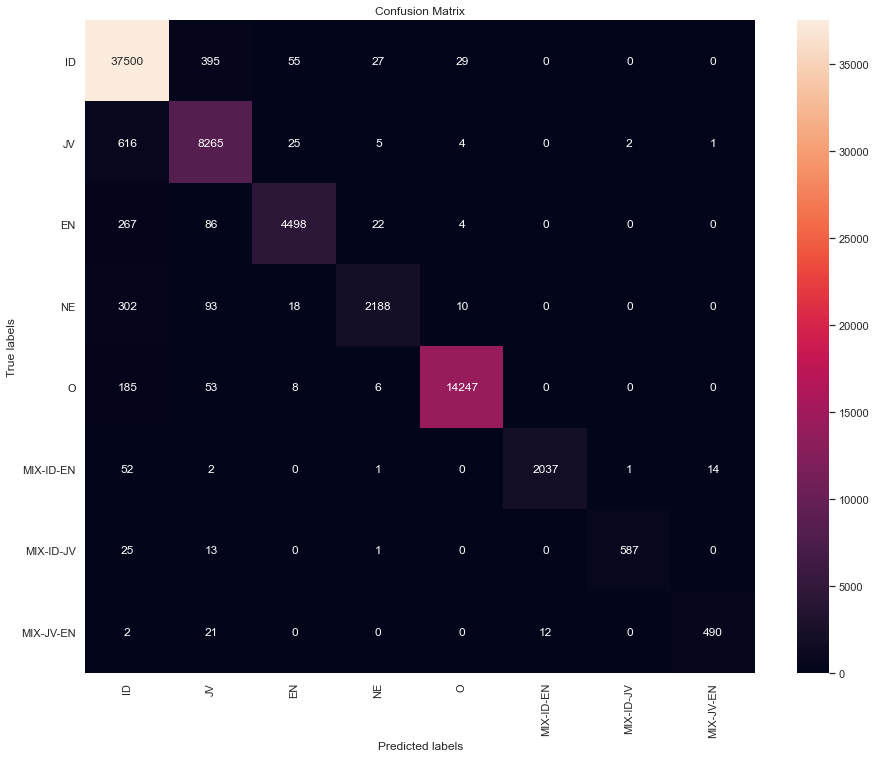


Top likely transitions:
O          -> O          5.46642
ID         -> O          4.76669
EN         -> O          4.73107
JV         -> O          4.63375
NE         -> O          4.54584
MIX-ID-EN  -> O          4.22739
MIX-JV-EN  -> O          3.85589
MIX-ID-JV  -> O          3.69223
NE         -> NE         2.40288
JV         -> JV         1.67882
EN         -> EN         1.67355
JV         -> MIX-JV-EN  1.39989
ID         -> NE         1.24220
EN         -> NE         1.20052
JV         -> NE         0.94811
ID         -> ID         0.83694
MIX-JV-EN  -> JV         0.76727
MIX-ID-JV  -> JV         0.75273
ID         -> MIX-ID-EN  0.65845
JV         -> MIX-ID-JV  0.56786

Top unlikely transitions:
NE         -> EN         -0.30629
MIX-ID-JV  -> ID         -0.32426
EN         -> MIX-JV-EN  -0.34282
MIX-ID-JV  -> EN         -0.54989
NE         -> MIX-JV-EN  -0.56733
NE         -> MIX-ID-EN  -0.66200
ID         -> JV         -0.68682
MIX-JV-EN  -> MIX-ID-JV  -0.69865
MIX-JV-EN  -> EN

In [4]:
langid.train_test_result_(train_data=train_data, test_data=test_data, n_label=8, model_name='mod_080422.pkl')

## Scenario 2:
1. Using different data for training and test data.
2. Exclude named entity. Replace NE into O

In [ ]:
train_data_ = read_tsv('../raw dataset/all-tagged-280322-train-no-ne.tsv')
test_data_ = read_tsv('../raw dataset/all-tagged-080422-test-no-ne.tsv')

In [ ]:
langid.train_test_result_(train_data=train_data_, test_data=test_data_, n_label=7, model_name='mod_080422_no_ne.pkl')

## Scenario 3:
1. Merge between training and test data
2. Include named entity

In [ ]:
dataset = read_tsv('../raw dataset/all-tagged-090422-merged.tsv')
langid.train_test_result(data=dataset, test_size=0.33, n_label=8, model_name='mod_090422.pkl')

In [ ]:
dataset_no_ne = read_tsv('../raw dataset/all-tagged-090422-merged-no-ne.tsv')
langid.train_test_result(data=dataset_no_ne, test_size=0.33, n_label=7, model_name='mod_090422_no_ne.pkl')